# Bernstein Vazzirani algorithm:

Author: Mainak Bhattacharyya

The problem: Let we have a function $f: \{0,1\}^n \to \{0,1\}$, such that there is a secret string $s$, such that $f(x) = x.s$ (mod 2), where $x,s \in \{0,1\}^n$. Design an algorithm to find $s$.

Classical solution:

1. First solution method that comes in our mind is the brut-force one. So, for a $n$ bit string, there are $2^n$ possibilities for $s$. So, we can try to feed each of them in the oracle and tally up the correct string. This is too much exhaustind and has exponential time complexity.

2. Suprisingly if you look at the problem, we can do better. **We can solve the Bernstein-Vazzirani problem in linear time $n$**. To see that we prove:
\begin{align}
f(x) = s_j, \,\text{if}\, x_j = 1 \,\text{and}\, x_i = 0; \,\forall\, i \neq j. 
\end{align}

The proof is very simple. As $f(x) = x.s$, $x_i.s_i = 0, \forall x_i = 0$. Thus the only non-zero bit of $x$, which is $x_j = 1$ determines the bit values of $s_j$, as $x_j . s_j = s_j, \,\text{if}\, x_j = 1$.

Thus, we need to try only $n$ combinations with $1$ at each of the $n$ position to extract the string $s$. This is the lower bound on the query complexity.

### Can we do better with quantum?

The answer is yes! 

We now describe the Bernstein Vazzirani algorithm:

\begin{align}
H^{\otimes n}\ket{0}^{\times n} \to \ket{+}^{\times n} &:= \sum_{x \in \{0,1\}^n} \ket{x},\\

U_f \sum_{x \in \{0,1\}^n} \ket{x} &= \sum_{x \in \{0,1\}^n} (-1)^{f(x)}\ket{x},\\
&= \sum_{x \in \{0,1\}^n} (-1)^{s.x}\ket{x},\\
H^{\otimes n}\sum_{x \in \{0,1\}^n} (-1)^{s.x}\ket{x} &= \ket{s}.
\end{align}

> Bernstein-Vazzirani algorithm is solved in exactly $1$ query!

In [1]:
import pennylane as qml

Let $s = 101$

|  x   | f(x)|
|------|-----|
| 000  | 0   |
| 001  | 1   |
| 100  | 1   |
| 011  | 1   |
| 101  | 0   |
| 110  | 1   |
| 111  | 0   |

In [8]:
# Sectret string
s = "101"

# Define a quantum device
device = qml.device("default.qubit", wires=len(s)+1, shots = 1)

@qml.qnode(device)
# The complete protocol
def bv(string: str):
    # Your code goes here ->

    # Ancilla setup
    qml.PauliX(wires=len(string))
    qml.Hadamard(wires=len(string))

    qml.Barrier()

    # Create an equal superposition of 2^n states.
    for i in range(len(string)):
        qml.Hadamard(wires= i)

    qml.Barrier()

    # Apply the Bernstein Vazzirani oracle:
    for i in range(len(string)):
        if int(string[i]) == 1:
            qml.CNOT(wires=[i, len(string)])
    
    qml.Barrier()

    # Create the final Hadamard transform
    for i in range(len(string)):
        qml.Hadamard(i)
    # returns Measured final state.
    return qml.sample(wires = range(len(string)))

In [9]:
bv(string=s)

tensor([1, 0, 1], requires_grad=True)

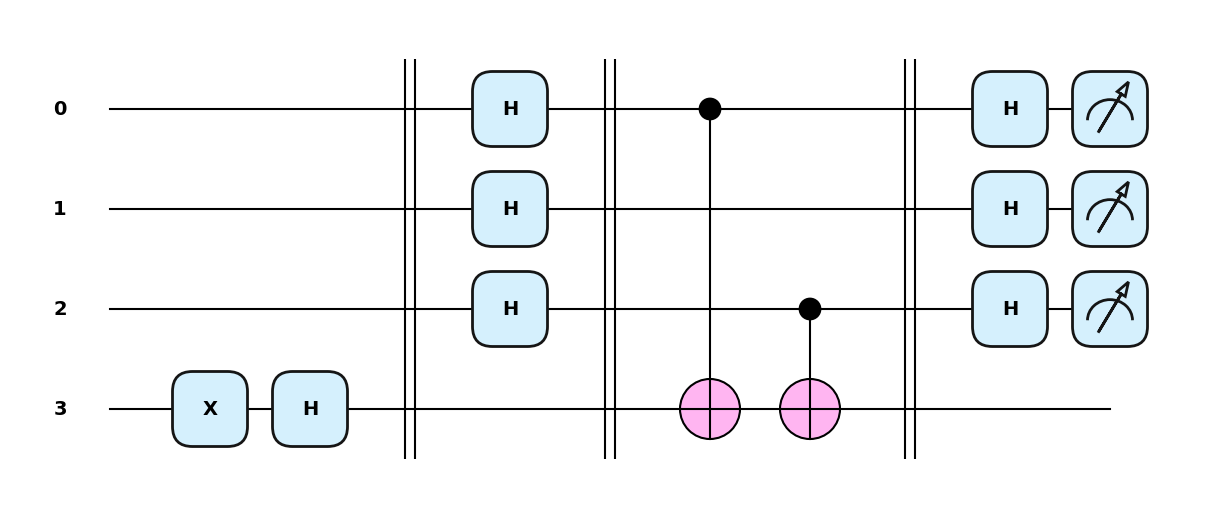

In [10]:
# Visualize the teleportation circuit
_ = qml.draw_mpl(bv, style="pennylane")(s)